In [1]:
from cellorganizer.tools import img2slml
from cellorganizer.tools import slml2info
import datetime
import glob
import urllib.request
import os
import uuid
from IPython.core.display import display, HTML, Image

model_name = "Module2D"
module_name = model_name
topdir = "/home/murphylab/cellorganizer/local/results"
outputdir = topdir + "/" + module_name
if not os.path.exists(topdir):
    os.makedirs(topdir)
os.chdir(topdir)
os.system("ls")
if not os.path.exists(outputdir):
    os.makedirs(outputdir)
os.chdir(outputdir)
os.system("ls")

options = {}

#set general options
options["model.name"] = module_name
options["model.filename"] = module_name + '.mat'
options["output_filename"] = module_name 
options["verbose"] = 0
options["debug"] = 0
options["display"] = 0
options["model.id"] = str (uuid.uuid1())
options["downsampling"] = [5, 5, 1]
options["model.resolution"] = [0.049, 0.049, 0.2000]
#options["if_skip_cell_nuclear_model"] = 1

#set options that control what kind of model is created
options["train.flag"] = 'cell'
options["cell.class"] = 'cell_membrane'
options['cell.type'] = 'spharm_rpdm'
# increasing these numbers increases compute time but potentially
# improves model quality; the reported Hausdorff distances between the
# reconstructions and the original shapes can be used to evaluate this
options['spharm_rpdm.NMfirsttry_maxiter'] = 300
options['spharm_rpdm.NMretry_maxiter'] = 100
options['spharm_rpdm.NMretry_maxiterbig'] = 300

# decreasing these numbers decreases compute time but potential reduces model quality
options['spharm_rpdm.NMcost_tol'] = 1e-7
options['spharm_rpdm.NMlargr_tol'] = 1e-7

# degree of spherical harmonic descriptor
options['spharm_rpdm.maxDeg'] = 31
# if the error in the parameterization for a given cell is higher than this, discard that cell
# (note that there is a separate option hd_threshold that controls which cells are in reports)
options['hd_thresh'] = 10

# postprocess of parameterization: alignment
options['model.spharm_rpdm.postprocess'] = True
# degree of the descriptor
options['model.spharm_rpdm.maxDeg'] = options['spharm_rpdm.maxDeg']
# cellular components: either {'cell'}, {'nuc'}, or {'cell', 'nuc'}
options['model.spharm_rpdm.components'] = {'cell'}
# # alignment method: 'major_axis' or 'foe'
options["model.spharm_rpdm.alignment_method"] = 'major_axis'
# # plane of rotation: 'xy', 'xz', 'yz' or 'xyz'
options["model.spharm_rpdm.rotation_plane"] = 'xy'
# # degree of the descriptor
options["model.spharm_rpdm.maxDeg"] = 31
# latent dimension for the model (number of principal components to keep)
options["model.spharm_rpdm.latent_dim"] = 15
# minimum fractional volume that nucleus has to have to keep that cell
options["model.spharm_rpdm.segminnucfraction"] = 0.1

options['model.resolution'] = [0.049, 0.049, 0.2000]
#options['downsampling'] = [5, 5, 1]
# this comment shows how to downsample another 2 fold in xyz (8 fold overall)
options['downsampling'] = [10, 10, 2]

dimensionality = '3D'
options['documentation.description'] = 'This model has been trained using demo3D50 from CellOrganizer'

options["masks"] = []

directory = '/home/murphylab/cellorganizer/local/images/HeLa/3D/processed/'
cellImagesDirectoryPath = []

file_pattern = 'LAM_cell1?_mask_t1.tif'
for name in glob.glob(directory + file_pattern):
    options["masks"].append(name)

file_pattern = 'LAM_cell1?_ch1_t1.tif'
for name in glob.glob(directory + file_pattern):
    cellImagesDirectoryPath.append(name)
    
cellImagesDirectoryPath.sort()
options["masks"].sort()

# this is the main function call 
# the 2nd, 3rd, and 4th arguments to img2slml are the list of nuclear or DNA images, 
# the list of cell membrane images, and the list of protein/organelle images
#
# note that since we are not building a nuclear model or a protein model (see options.train.flag="cell" above),
# we don't need to provide nuclear images or protein images
# and note that options.masks was set above to point to masks for the individual cells in the images
##img2slml('3D', dnaImagesDirectoryPath, cellImagesDirectoryPath, proteinImagesDirectoryPath, options)
img2slml('3D', [], cellImagesDirectoryPath, [], options)

True

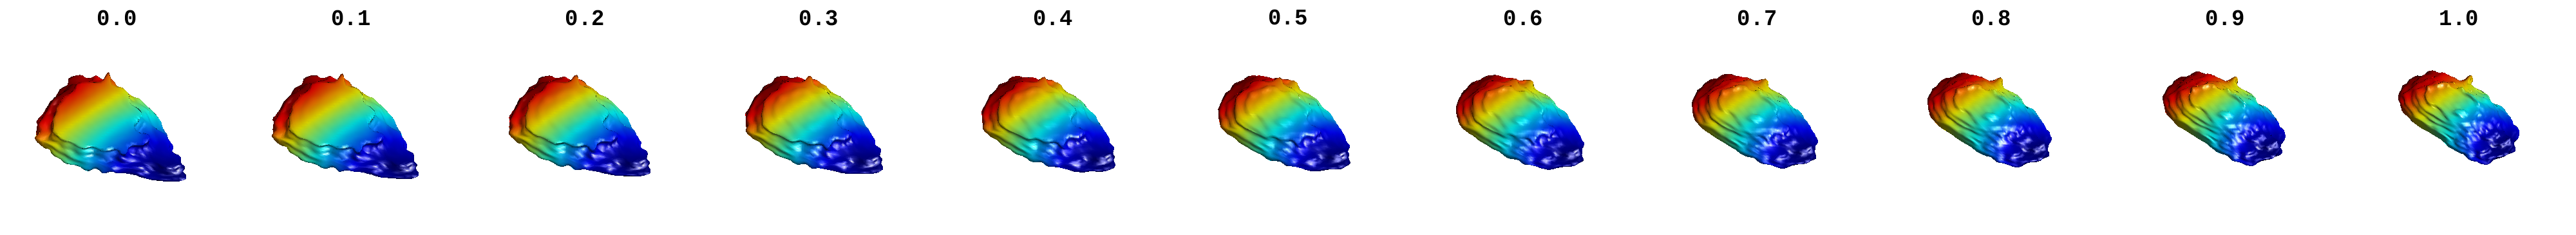

In [8]:
os.chdir("..")
#now set options for img2info
options = {}
         
answer = slml2info([module_name + ".mat"],options)

In [9]:
HTML(filename="index.html")

Cell Membrane File,Nuclear Membrane File,Parameter,Preprocessing Status
/home/murphylab/cellorganizer/local/images/HeLa/3D/processed/LAM_cell10_ch1_t1.tif,/home/murphylab/cellorganizer/local/images/HeLa/3D/processed/LAM_cell10_ch1_t1.tif,param1.mat,Accepted
/home/murphylab/cellorganizer/local/images/HeLa/3D/processed/LAM_cell11_ch1_t1.tif,/home/murphylab/cellorganizer/local/images/HeLa/3D/processed/LAM_cell11_ch1_t1.tif,param2.mat,Accepted
/home/murphylab/cellorganizer/local/images/HeLa/3D/processed/LAM_cell12_ch1_t1.tif,/home/murphylab/cellorganizer/local/images/HeLa/3D/processed/LAM_cell12_ch1_t1.tif,param3.mat,Accepted
/home/murphylab/cellorganizer/local/images/HeLa/3D/processed/LAM_cell13_ch1_t1.tif,/home/murphylab/cellorganizer/local/images/HeLa/3D/processed/LAM_cell13_ch1_t1.tif,param4.mat,Accepted
/home/murphylab/cellorganizer/local/images/HeLa/3D/processed/LAM_cell14_ch1_t1.tif,/home/murphylab/cellorganizer/local/images/HeLa/3D/processed/LAM_cell14_ch1_t1.tif,param5.mat,Accepted
/home/murphylab/cellorganizer/local/images/HeLa/3D/processed/LAM_cell15_ch1_t1.tif,/home/murphylab/cellorganizer/local/images/HeLa/3D/processed/LAM_cell15_ch1_t1.tif,param6.mat,Accepted
/home/murphylab/cellorganizer/local/images/HeLa/3D/processed/LAM_cell16_ch1_t1.tif,/home/murphylab/cellorganizer/local/images/HeLa/3D/processed/LAM_cell16_ch1_t1.tif,param7.mat,Accepted
/home/murphylab/cellorganizer/local/images/HeLa/3D/processed/LAM_cell17_ch1_t1.tif,/home/murphylab/cellorganizer/local/images/HeLa/3D/processed/LAM_cell17_ch1_t1.tif,param8.mat,Accepted
/home/murphylab/cellorganizer/local/images/HeLa/3D/processed/LAM_cell18_ch1_t1.tif,/home/murphylab/cellorganizer/local/images/HeLa/3D/processed/LAM_cell18_ch1_t1.tif,param9.mat,Accepted


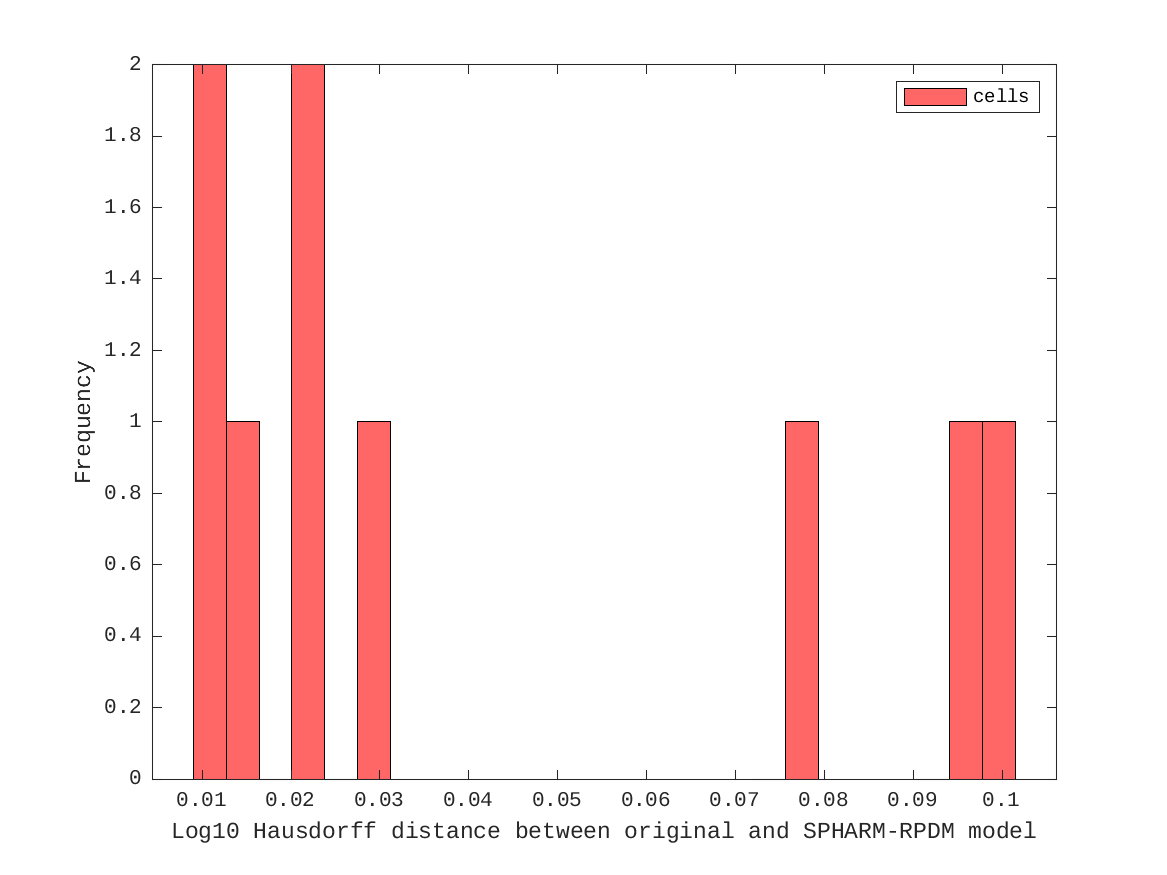

In [10]:
Image(filename="hausdorff_distance_histogram.png")

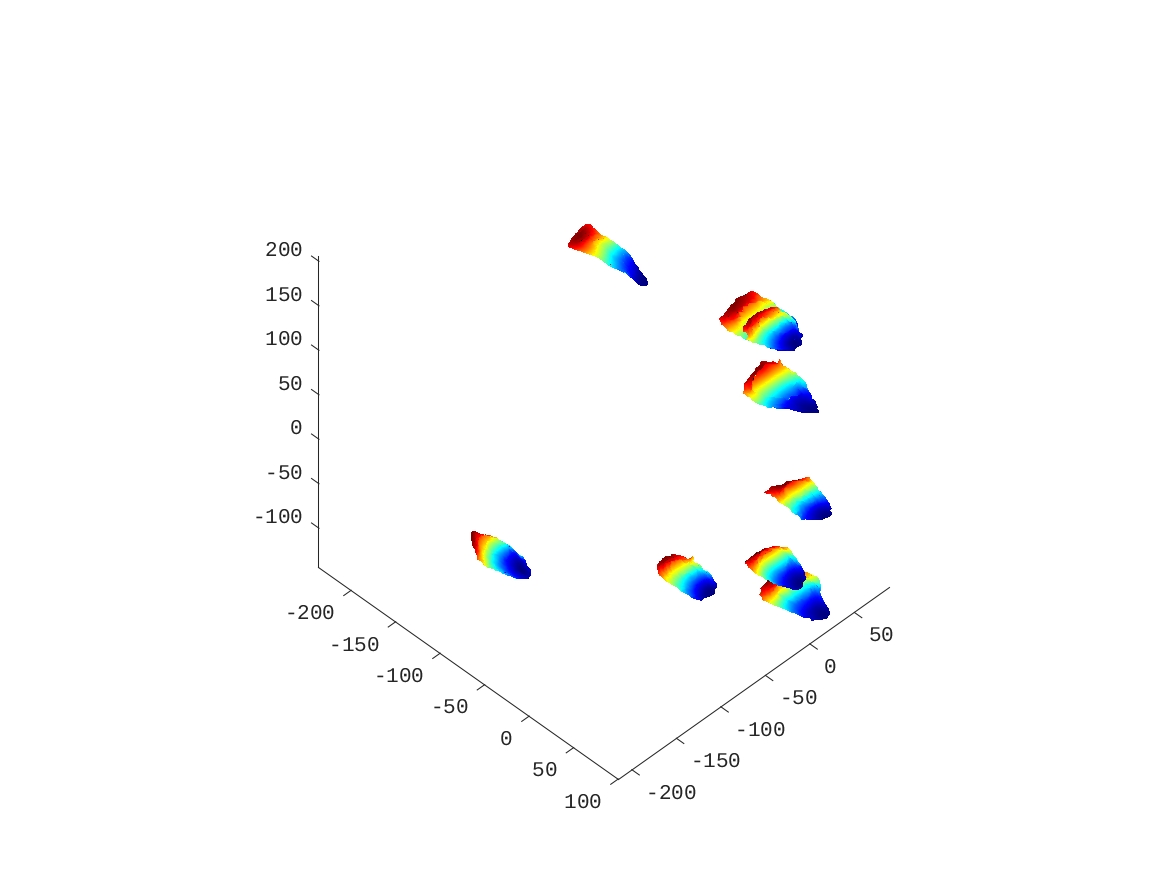

In [11]:
Image(filename="show_shape_space.png")

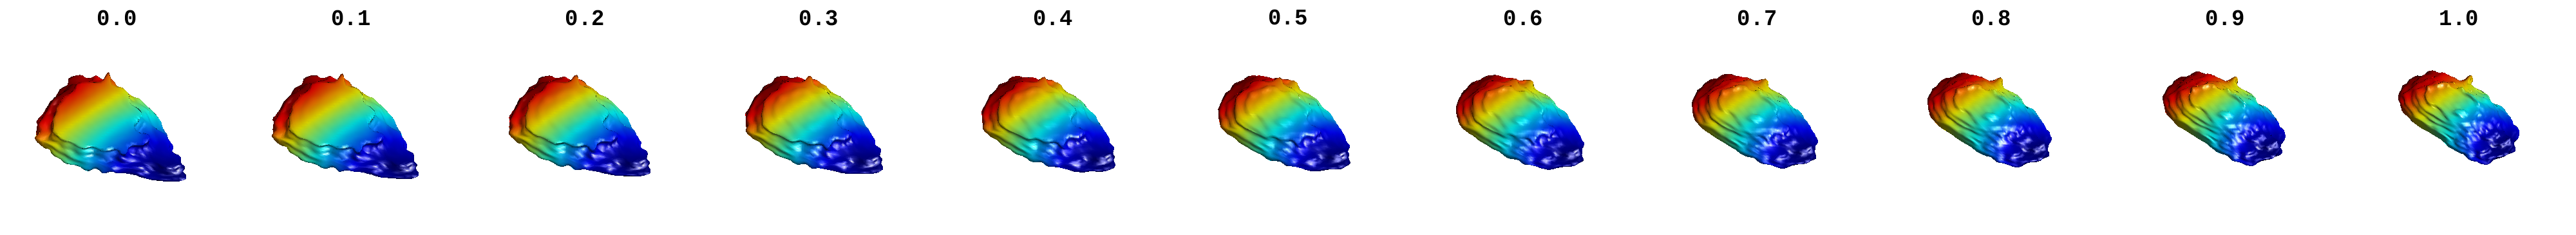

In [12]:
Image(filename="show_shape_evolution.png")